In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import jinja2

In [2]:
name= 'Adam'
age=23

In [3]:
tmpl = jinja2.Template('My name is {{ name }} and age {{ age }}')
tmpl

<Template memory:7fa5ce74ef10>

In [4]:
tmpl.render(name='Mark',age=33)

'My name is Mark and age 33'

In [5]:
tmpl.render(name=name,age=age)

'My name is Adam and age 23'

In [7]:
tmpl = jinja2.Template('My name is {{ dt.name }} and age {{ dt.age }}')
tmpl

<Template memory:7fa5ce568a90>

In [8]:
sl = {'name' : 'Adam', 'age':23}

In [9]:
tmpl.render(dt=sl)

'My name is Adam and age 23'

# HTML

In [11]:
%%HTML

<!DOCTYPE html>
<html>
    <head>
            <title>Page Title</title>
    </head>
    
    <body>

        <h1>This is a Heading</h1>
        <p>This is a paragraph.</p>

    </body>
</html>

In [33]:
tmpl = jinja2.Template('''<!DOCTYPE html>
<html>
    <head>
            <title>Page Title</title>
    </head>
    
    <body>

        <h1>This is a Heading</h1>
        <p>{{dt.name}}</p>
        <p>{{dt.age}}</p>
        
        
        {% for it in dataList %}
          <li>{{ it.tbl }}</li>
          <img src={{ it.im }} alt="alternatetext">
        {% endfor %}

    </body>
</html>
''')

tmpl

<Template memory:7fa5c6257050>

In [14]:
from IPython.core.display import display, HTML

In [17]:
display(HTML(tmpl.render(dt=sl)))

In [19]:
ll = range(9)
ll

range(0, 9)

In [20]:
display(HTML(tmpl.render(dt=sl, myList=ll)))

In [21]:
%pwd

'/home/u1/22_dydaktyka/04inzynier/notebooks'

In [22]:
df = pd.read_csv('../data/countryPopulation.csv',sep=';')
df.head()

,Country,geo,zone,island,c2020
0,Afghanistan,Asia,south,no,38928341
1,Albania,Europe,south,no,2877800
2,Algeria,Africa,north,no,43851043
3,American Samoa,Oceania,other,yes,55197
4,Andorra,Europe,south,no,77265


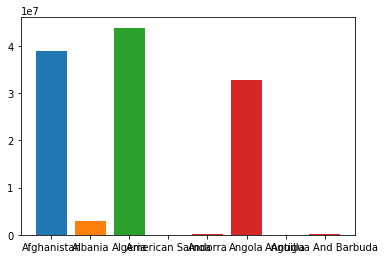

In [34]:
step = 5
ll = []
add = '../img/im0{}.png'
sl = {}

for i in range(4):
    tmp = df.iloc[i:i+step,:]
    plt.bar(tmp.Country,tmp.c2020)
    plt.savefig(add.format(i+1))
    tmp = tmp.to_html()
    
    sl['tbl'] = tmp
    sl['im'] = add.format(i+1)
    
    ll.append(sl)
    

In [36]:
display(HTML(tmpl.render(dt=sl, dataList=ll)))

,Country,geo,zone,island,c2020
3,American Samoa,Oceania,other,yes,55197
4,Andorra,Europe,south,no,77265
5,Angola,Africa,middle,no,32866267
6,Anguilla,America,middle,yes,15002
7,Antigua And Barbuda,America,middle,yes,97928
,Country,geo,zone,island,c2020
3,American Samoa,Oceania,other,yes,55197
4,Andorra,Europe,south,no,77265
5,Angola,Africa,middle,no,32866267
6,Anguilla,America,middle,yes,15002
